In [2]:
import numpy as np
import pandas as pd
import seaborn as sns                                                                         #food
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Morad/Desktop/projects/project_2/HICP - food.csv")

In [4]:
df = df.rename(columns = {
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "price"
})
df_ = df[["country","year","price"]]   #chose the needed columns to calculate different function 

In [5]:
'''
chosen countries max =  Lithuania 
                 moderate = Ireland
                 min =  Cyprus, Italy
'''
#1
country = ["Lithuania", "Ireland", "Italy", "Cyprus"]
filtter_Graph = (df_["country"].isin(country))
df_ = df_.loc[filtter_Graph, ["country","year","price"]]
#df_

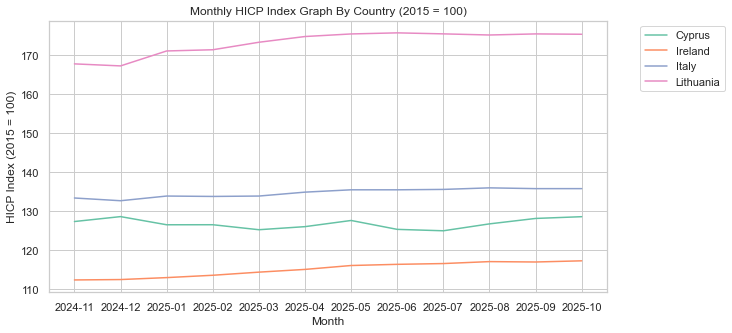

In [6]:
#fig1
sns.set_theme(style = "whitegrid")
plt.figure(figsize =(10,5))
sns.lineplot(data = df_  , x = "year", y = "price",hue = "country",palette = "Set2")     

plt.title("Monthly HICP Index Graph By Country (2015 = 100)")
plt.ylabel("HICP Index (2015 = 100)")
plt.xlabel("Month")
plt.legend(bbox_to_anchor= (1.05,1), loc ="upper left")

In [7]:
#2
total_change = (df_.groupby("country")
                .apply(lambda x : (x["price"].iloc[-1] / x["price"].iloc[0] -1 ) * 100)
                .reset_index(name = "total_change_pct")
            ).round(2)
total_change

,country,total_change_pct
0,Cyprus,0.97
1,Ireland,4.36
2,Italy,1.80
3,Lithuania,4.53


Text(0.5, 1.0, 'Cumulative Change % - Nov 2024 to Oct 2025')

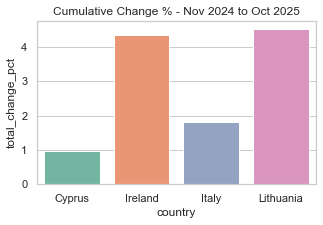

In [8]:
#fig2
sns.set_theme(style = "whitegrid")
plt.figure(figsize =(5,3))
sns.barplot(data = total_change ,x = "country" , y = "total_change_pct", palette = "Set2")    

plt.title("Cumulative Change % - Nov 2024 to Oct 2025")


In [9]:
e_1 = df_.groupby("country")["price"].agg(["min"]).sort_values("min",ascending = True)

In [10]:
e_2 = df_.groupby("country")["price"].agg(["std"]).sort_values("std",ascending = True).round(2)

In [11]:
e_3 = df_.groupby("country")["price"].agg(["mean"]).sort_values("mean",ascending = True).round(2)

In [12]:
e_4 = df_.groupby("country")["price"].agg(["max"]).sort_values("max",ascending = True)

In [14]:
df_table = e_1.join([e_2,e_3,e_4,]) 
df_table["delta"] = (e_4["max"] - e_1["min"])
df_table = pd.DataFrame(data = df_table).sort_values("country", ascending = False)
df_table.to_csv("C:/Users/Morad/Desktop/projects/project_2/to_csv/food.csv")